# TODO
- TODO: Clean validation data
- TODO: 192x192
- TODO: 16 epoch nur Center + flip, dann mit R/L und ausblendfenster geradeaus

In [14]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)

<module 'self_driving_car.model' from '/home/carnd/CarND-Behavioral-Cloning-P3/self_driving_car/model.py'>

In [15]:
def plot_balance( data ):
    x1 = data['steering'].values
    x2 = data[data['is_train'] == True]['steering'].values
    x3 = data[data['is_valid'] == True]['steering'].values

    # the histogram of the data
    fig = plt.figure(figsize=(18,4))
    plt.subplot(1,3,1)
    plt.title(r'Histogram of steeringe angles (all) (m = %.4f)' % np.mean(x1)); plt.grid(zorder=0)
    n, bins, patches = plt.hist(x1, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='green', alpha=0.75)
    plt.xlabel('Steering'); plt.ylabel('Probability')
    plt.xlim((-0.35,0.35)); plt.ylim((0,10));
    plt.subplot(1,3,2)
    plt.title(r'Histogram of steeringe angles (train) (m = %.4f)' % np.mean(x2)); plt.grid(True);
    n, bins, patches = plt.hist(x2, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='red', alpha=0.75)
    plt.xlabel('Steering'); plt.ylabel('Probability')
    plt.xlim((-0.35,0.35)); plt.ylim((0,10));
    plt.subplot(1,3,3)
    plt.title(r'Histogram of steeringe angles (valid) (m = %.4f)' % np.mean(x3)); plt.grid(True)
    n, bins, patches = plt.hist(x3, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='blue', alpha=0.75)
    plt.xlabel('Steering'); plt.ylabel('Probability')
    plt.xlim((-0.35,0.35)); plt.ylim((0,10)); 
    plt.show()

In [16]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.shuffle() # KEIN SHUFFLE?!?
datagen.deactivate_mod('mod_blur')
datagen.deactivate_mod('mod_shadow')
datagen.deactivate_mod('mod_flip')
datagen.deactivate_mod('mod_lighting')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.split(valid_size=0.2)
plot_balance(datagen.data)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data//dataset4_beta_sim/index.pkl'

In [239]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.shuffle() # KEIN SHUFFLE?!?
datagen.split(valid_size=0.2)
#datagen.deactivate_cam('L')
#datagen.deactivate_cam('R')
datagen.deactivate_mod('mod_blur')
datagen.deactivate_mod('mod_shadow')
#datagen.deactivate_mod('mod_flip')
datagen.deactivate_mod('mod_lighting')
if True:
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.50)   
    datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
print("Number of samples:           ", datagen.num_of_samples('all'))
print("Numver of training samples:  ", datagen.num_of_samples('train'))
print("Number of validation samples:", datagen.num_of_samples('valid'))
print("soll", (len(datagen.data)/(3*5)))

shuffled data
split data into 30156 training sample and 7539 validation samples
steering angle corrected by +/- 0.180000
Number of samples:            37695
Numver of training samples:   12135
Number of validation samples: 2943
soll 2513.0


In [240]:
datagen.data[datagen.data.is_train == True]

,img,steering,throttle,brake,speed,cam,filter,flip,is_train,is_valid
9880,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.046163,1.0,0.0,3.019023e+01,C,mod_identity,1,True,False
11380,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.015028,1.0,0.0,3.018993e+01,C,mod_identity,1,True,False
14623,dataset4_beta_sim/IMG_preprocessed/mod_flip_ce...,-0.011903,1.0,0.0,3.019015e+01,C,mod_flip,-1,True,False
35790,dataset4_beta_sim/IMG_preprocessed/mod_identit...,0.066466,1.0,0.0,3.018987e+01,L,mod_identity,1,True,False
35970,dataset4_beta_sim/IMG_preprocessed/mod_identit...,0.165983,1.0,0.0,3.019034e+01,L,mod_identity,1,True,False
31248,dataset4_beta_sim/IMG_preprocessed/mod_flip_le...,0.188847,1.0,0.0,3.019049e+01,L,mod_flip,-1,True,False
17895,dataset4_beta_sim/IMG_preprocessed/mod_identit...,0.057390,1.0,0.0,3.019007e+01,L,mod_identity,1,True,False
20078,dataset4_beta_sim/IMG_preprocessed/mod_flip_ri...,-0.146590,1.0,0.0,3.018988e+01,R,mod_flip,-1,True,False
16423,dataset4_beta_sim/IMG_preprocessed/mod_flip_ce...,0.021094,1.0,0.0,3.019054e+01,C,mod_flip,-1,True,False
12025,dataset4_beta_sim/IMG_preprocessed/mod_identit...,-0.009720,1.0,0.0,3.018993e+01,C,mod_identity,1,True,False


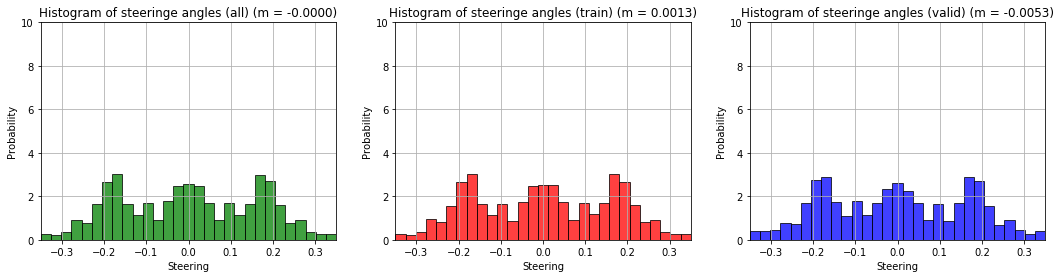

In [242]:
#model = self_driving_car.model.SDRegressionModel("udacity")
model = self_driving_car.model.SDRegressionModel("simple")
model.train_generator(datagen, "20170211_D", nb_epoch = 8)

Instructions for updating:
Please switch to tf.summary.merge_all.


KeyboardInterrupt: 

In [232]:
model.load_weights(session_name, epoch)
model.train_generator(datagen, "20170211_F3", nb_epoch = 4, lr = 0.008)


setting learning rate to 0.008000
Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/4
11904/12062 [============================>.] - ETA: 0s - loss: 0.0192 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple/weights/20170211_F2/weights.00-0.0213.hdf5
12096/12062 [==============================] - 64s - loss: 0.0192 - val_loss: 0.0213
Epoch 2/4
12096/12062 [==============================] - 62s - loss: 0.0207 - val_loss: 0.0229
Epoch 3/4
12096/12062 [==============================] - 62s - loss: 0.0188 - val_loss: 0.0217
Epoch 4/4
12096/12062 [==============================] - 62s - loss: 0.0172 - val_loss: 0.0195


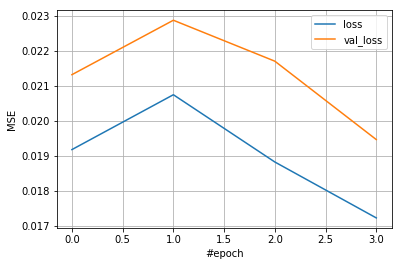

In [233]:
history = model._history
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('#epoch'); plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [193]:
import pydot_ng
from keras.utils.visualize_util import plot
model.model.summary()
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_9 (Cropping2D)        (None, 68, 128, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
convolution2d_17 (Convolution2D) (None, 34, 64, 32)    416         cropping2d_9[0][0]               
____________________________________________________________________________________________________
leakyrelu_1 (LeakyReLU)          (None, 34, 64, 32)    0           convolution2d_17[0][0]           
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 17, 32, 64)    8256        leakyrelu_1[0][0]                
___________________________________________________________________________________________

# Model: Udacity
![model_udacity](./doc/images/model_udacity.png)

(1004, 128, 128, 3)
(1004, 1)


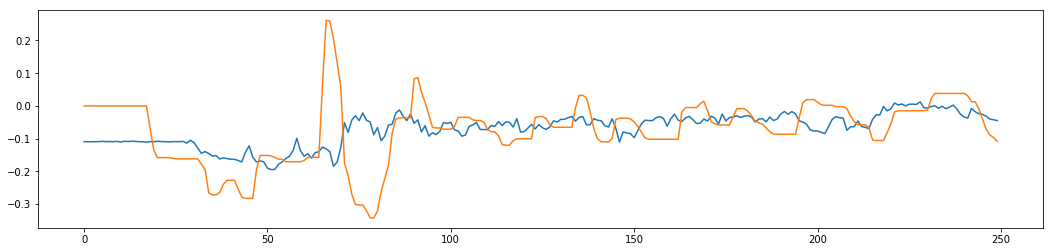

In [216]:
datagen.normalizer = model.normalizer
vdata = datagen.get_valid_data()
print(vdata[0].shape)
s_pred = model.model.predict(vdata[0], batch_size=128)
print(s_pred.shape)

plt.figure(figsize=(18,4))
plt.plot(s_pred[:500:2]) # blau
plt.plot(vdata[1][:500:2]) # orange
plt.show()

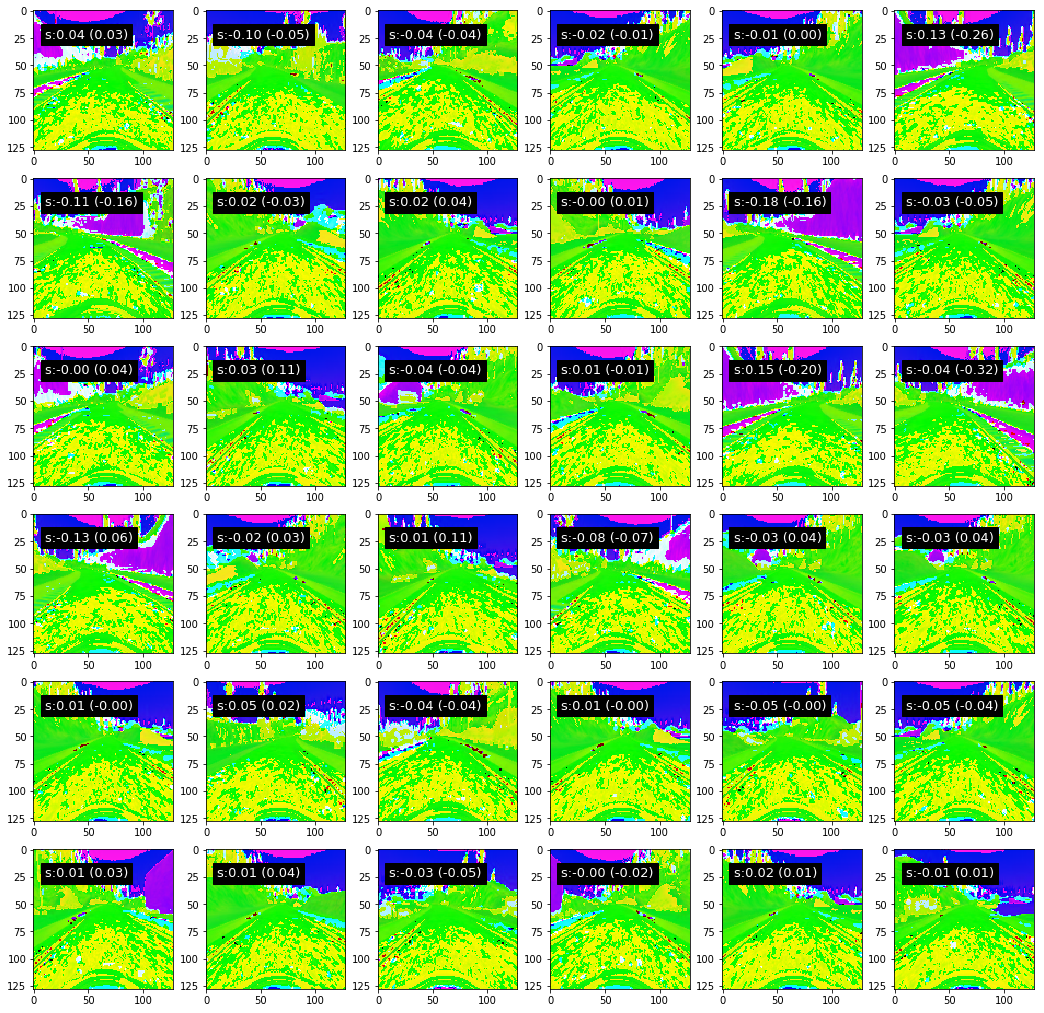

In [208]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = np.random.randint(vdata[0].shape[0]);
    img = vdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s_pred[idx], vdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

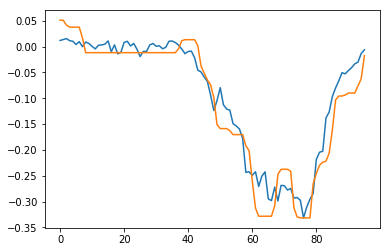

In [214]:
gen = datagen.get_batch_generator()
tdata = next(gen)
s2_pred = model.model.predict(tdata[0], batch_size=192)
plt.figure()
plt.plot(s2_pred[::2]) # blau
plt.plot(tdata[1][::2]) # orange
plt.show()

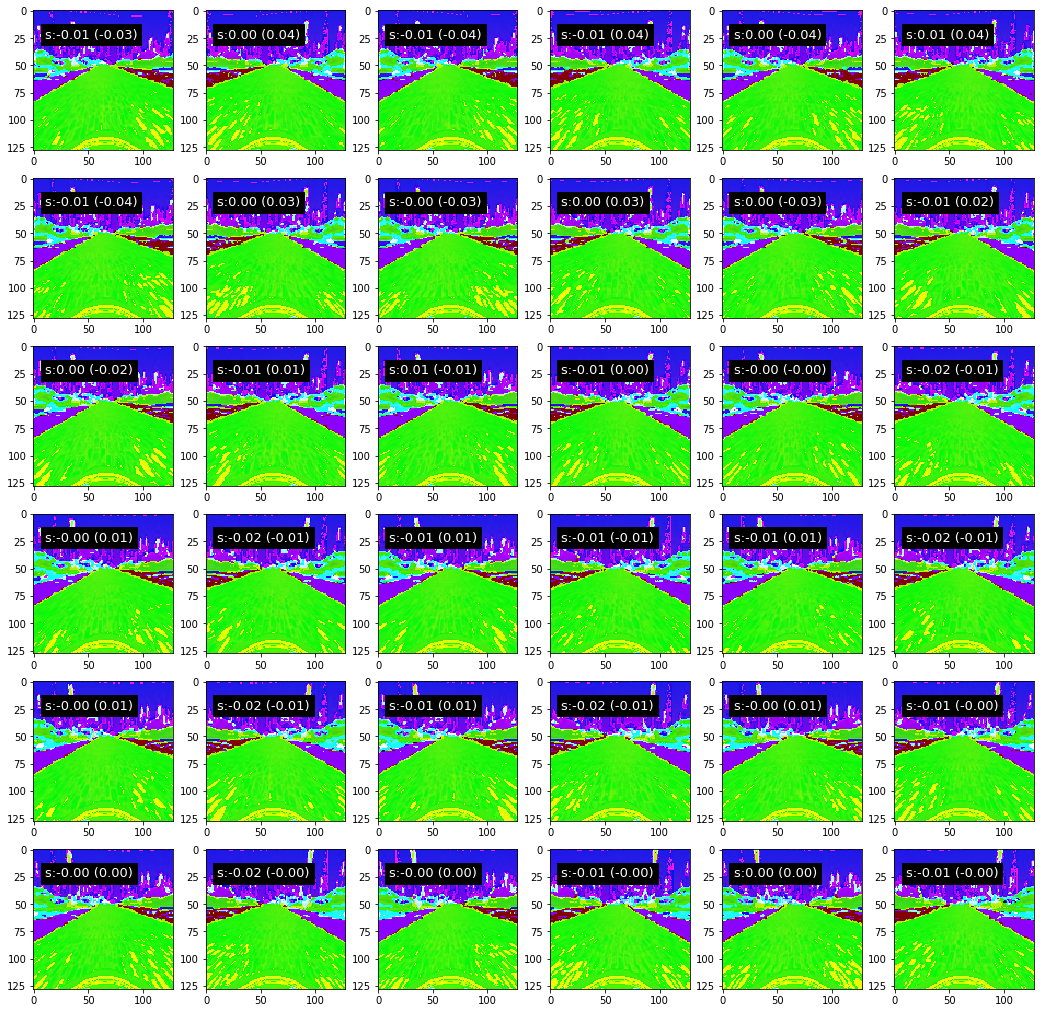

In [210]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = i;
    img = tdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s2_pred[idx], tdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

In [ ]:
#datagen.add_dataset("dataset1_udacity")
#datagen.add_dataset("dataset2_twe_one_lap")
#datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
#datagen.smooth_steering(window=60); # <<<<<<<< das ist gut -- ne
# DAS WAR GUT:
#datagen.filter_data_not_moving()
#datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.03)
##datagen.filter_data_low_steering(low_steering_threshold = 0.04, low_steering_remove_prop = 0.4+0.1)
##datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.5+0.1)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.3)
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.6+0.1) #raus?
#datagen.correct_camera_steering(0.05)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.30) # NEW?
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.85) # <
#datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.85) # NEU (x2)
#datagen.correct_camera_steering(0.08)
#datagen.correct_camera_steering(0.18)